In [190]:
%pip install PyMuPDF pillow docx2pdf
%rm -r Images/* #CLEARS EVERYTHING IN IMAGES FOLDER

Note: you may need to restart the kernel to use updated packages.


In [191]:
import fitz
import os
from PIL import Image
from docx2pdf import convert
from IPython.display import Image, display


In [192]:
file_path = "files/O-RAN.WG3.TS.E2AP-R004-v07.00 (1).pdf"

if not file_path.lower().endswith(".pdf"):
    doc = fitz.open(file_path)
    pdfbytes = doc.convert_to_pdf()
    pdf_file = fitz.open("pdf", pdfbytes)
else:
    pdf_file = fitz.open(file_path)

In [193]:

page_nums = len(pdf_file)

In [194]:
Images_list= []
Text_list = []
for page_num in range(page_nums):
    page = pdf_file[page_num]
    page_dict = page.get_text("dict")
    blocks = page_dict["blocks"]

    textblocks = [b for b in blocks if b["type"] == 0]
    imageblocks = [b for b in blocks if b["type"] == 1]
    for t in textblocks:
        t['page'] = int(page_num)+1
    Text_list.extend(textblocks)
    
    with open("files/logo.jpeg","rb") as logo:
        logo_bytes = logo.read()

    page_list = [
    image for image in imageblocks
    if image["image"] and image["image"] != logo_bytes and len(image["image"]) > 700
    ]
    if page_list:
        for p in page_list:
            p['page'] = int(page_num)+1
        Images_list.extend(page_list)
    for i,img in enumerate(page_list, start =1):
        bytes = img["image"]
        ext = img["ext"]
        name = F"page{page_num+1}_img{i}.{ext}"

        with open(os.path.join('Images/',name),'wb') as image_file:
            image_file.write(bytes)
            image_file.close()
print(Images_list)

[{'number': 25, 'type': 1, 'bbox': (158.92999267578125, 477.03997802734375, 436.42999267578125, 600.7899780273438), 'width': 370, 'height': 165, 'ext': 'png', 'colorspace': 3, 'xres': 96, 'yres': 96, 'bpc': 8, 'transform': (277.5, 0.0, -0.0, 123.75, 158.92999267578125, 477.03997802734375), 'size': 7246, 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01r\x00\x00\x00\xa5\x08\x02\x00\x00\x00\xce\n\xe1}\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x1c\x00IDATx\x9c\xed\x9d\x0bT\x15\xd7\xb9\xc7\x81DD^\x82\x88\x08\x91\x1b\x8b\xc4\x06A\x886"\x89^\xe5\x8a$\xc14V\xa5\xbe\x1aK$\x8d\xadKM\xb4\xd4\xc8\xcbW\xc4G\xe2\x83\xa6\x18\x8c\xd4$\x026\x14\x8f\xa9(ic\xa2\x01A\x0c\xa6\x88\x05Wn\x0c\xe2E\x88\x11ENx\xa3\xa0\x02\xde/\x19\xba\xd7\xee\xcc93\xc3p\xf4\xec\x99\xf3\xfd\xd6^\xae9\xb3g\xf6\xec\xc7\x7f\xff\xe7\xdb3.\xc6\xea\x1e\x82 \x88I\xb12w\x05\x10\x04\xd1\x1ah+\x08\x82\x98\x18\xb4\x15\x04AL\x8c\nl\xe5NS\xeb\x8d\x93\xe70\x89\xa4;\xcdm\xe6\x1e%\xc40\xdaS\xaf\x1c\xb1

28 image(s) extracted


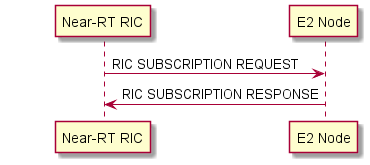

In [195]:
print(f"{len(Images_list)} image(s) extracted")
display(Image(data=Images_list[0]["image"]))

In [196]:
Images_list[0]

{'number': 25,
 'type': 1,
 'bbox': (158.92999267578125,
  477.03997802734375,
  436.42999267578125,
  600.7899780273438),
 'width': 370,
 'height': 165,
 'ext': 'png',
 'colorspace': 3,
 'xres': 96,
 'yres': 96,
 'bpc': 8,
 'transform': (277.5,
  0.0,
  -0.0,
  123.75,
  158.92999267578125,
  477.03997802734375),
 'size': 7246,
 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01r\x00\x00\x00\xa5\x08\x02\x00\x00\x00\xce\n\xe1}\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x1c\x00IDATx\x9c\xed\x9d\x0bT\x15\xd7\xb9\xc7\x81DD^\x82\x88\x08\x91\x1b\x8b\xc4\x06A\x886"\x89^\xe5\x8a$\xc14V\xa5\xbe\x1aK$\x8d\xadKM\xb4\xd4\xc8\xcbW\xc4G\xe2\x83\xa6\x18\x8c\xd4$\x026\x14\x8f\xa9(ic\xa2\x01A\x0c\xa6\x88\x05Wn\x0c\xe2E\x88\x11ENx\xa3\xa0\x02\xde/\x19\xba\xd7\xee\xcc93\xc3p\xf4\xec\x99\xf3\xfd\xd6^\xae9\xb3g\xf6\xec\xc7\x7f\xff\xe7\xdb3.\xc6\xea\x1e\x82 \x88I\xb12w\x05\x10\x04\xd1\x1ah+\x08\x82\x98\x18\xb4\x15\x04AL\x8c\nl\xe5NS\xeb\x8d\x93\xe70\x89\xa4;\xcdm\xe6

{'img': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01r\x00\x00\x00\xa5\x08\x02\x00\x00\x00\xce\n\xe1}\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x1c\x00IDATx\x9c\xed\x9d\x0bT\x15\xd7\xb9\xc7\x81DD^\x82\x88\x08\x91\x1b\x8b\xc4\x06A\x886"\x89^\xe5\x8a$\xc14V\xa5\xbe\x1aK$\x8d\xadKM\xb4\xd4\xc8\xcbW\xc4G\xe2\x83\xa6\x18\x8c\xd4$\x026\x14\x8f\xa9(ic\xa2\x01A\x0c\xa6\x88\x05Wn\x0c\xe2E\x88\x11ENx\xa3\xa0\x02\xde/\x19\xba\xd7\xee\xcc93\xc3p\xf4\xec\x99\xf3\xfd\xd6^\xae9\xb3g\xf6\xec\xc7\x7f\xff\xe7\xdb3.\xc6\xea\x1e\x82 \x88I\xb12w\x05\x10\x04\xd1\x1ah+\x08\x82\x98\x18\xb4\x15\x04AL\x8c\nl\xe5NS\xeb\x8d\x93\xe70\x89\xa4;\xcdm\xe6\x1e%\xc40\xdaS\xaf\x1c\xb1\xa9\xc0V\xa0%\xd9V\xc1\x98DR}\xc19s\x8f\x12b\x18\xed\xa9W\x8e\xd8Tc+\x15\x7f\xdcy\xe3d6&^\xaaH\xde\x89\xb6\xc22ZR\xaf|\xb1\xa9\xc6V\xa0U==\xff\xc2\xc4Ku\xf9\xd9h+,\xa3%\xf5\xca\x17\x1b\xda\x8a\xba\x137\xd2\x9f&\xef+...++\xab\xac\xac\xac\xad\xadmii1\xf7\xa0!\xbdhI\xbd\xf2\xc5\x86\xb6\xa2\xee\xc4\x8d\xb4n\

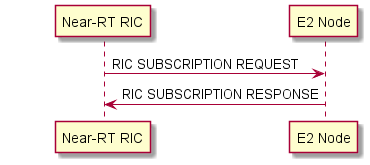

15


In [197]:
cleaned_image = []
for img in Images_list:
    cleaned_image.append({"img":img['image'],"bbox":img['bbox'],"page":img['page']})
print(cleaned_image[0])
display(Image(data=cleaned_image[0]['img']))
print(cleaned_image[0]['page'])


In [198]:
Text_list[4]["page"]

1

In [199]:
cleaned_text = []
for i in range(len(Text_list)):
    Textblock = []
    bbox = None
    page = None
    for line in Text_list[i]['lines']:
        for span in line['spans']:
            Textblock.append(span['text'])
        bbox = Text_list[i]['bbox']
        page = Text_list[i]['page']
    if "".join(Textblock).strip() != "":
        cleaned_text.append({"text":"".join(Textblock),"bbox":bbox,"page":page})

print(cleaned_text[1])
print(len(cleaned_text))

{'text': 'Copyright © 2025 by the O-RAN ALLIANCE e.V. ', 'bbox': (48.0, 678.2255859375, 256.82000732421875, 689.2513427734375), 'page': 1}
2427


In [205]:
def findcaption(image):
    best_text = None
    min_distance = float('inf')
    for text in cleaned_text:
        if text["page"] == image["page"]:
            if text["bbox"][1] > image["bbox"][3]:
                vertical_distance = image["bbox"][1] - text["bbox"][3]
                #print(text["text"],abs(round(vertical_distance)))
                #print("COMPARING",round(abs(vertical_distance)), min_distance)
                if round(abs(vertical_distance)) < min_distance:
                    min_distance = abs(vertical_distance)
                    best_text = text
    return best_text['text']


In [206]:
print(findcaption(cleaned_image[1]))

Figure 8.2.1.3-1: RIC Subscription procedure, unsuccessful operation 


In [207]:
captioned_photos = cleaned_image
for img in captioned_photos:
    img['caption']= findcaption(img)

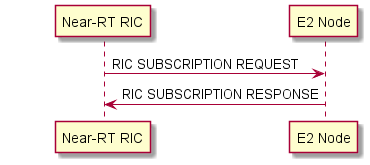

Figure 8.2.1.2-1: RIC Subscription procedure, successful operation  on page 15


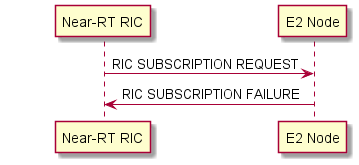

Figure 8.2.1.3-1: RIC Subscription procedure, unsuccessful operation  on page 17


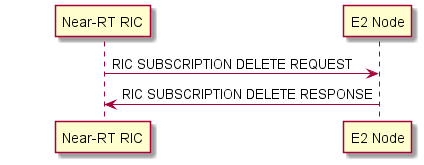

Figure 8.2.2.2-1: RIC Subscription Delete procedure, successful operation  on page 18


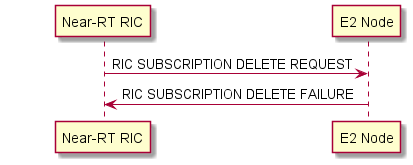

Figure 8.2.2.3-1: RIC Subscription Delete procedure, unsuccessful operation  on page 18


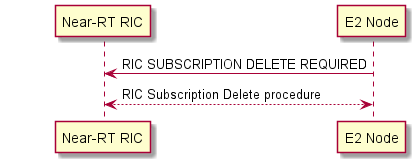

Figure 8.2.2A.2-1: RIC Subscription Delete Required procedure, successful operation  on page 19


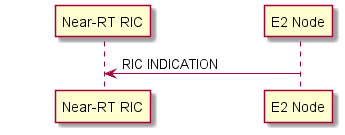

Figure 8.2.3.2-1: RIC Indication procedure, successful operation  on page 22


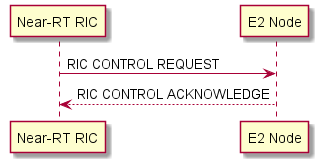

Figure 8.2.4.2-1: RIC Control procedure, successful operation  on page 23


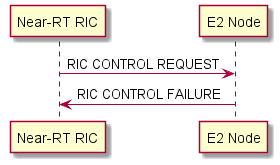

Figure 8.2.4.3-1: RIC Control procedure, unsuccessful operation  on page 24


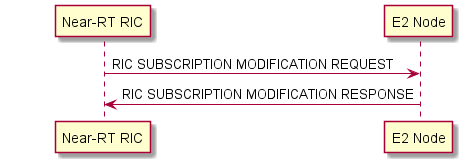

Figure 8.2.5.2-1: RIC Subscription Modification procedure, successful operation  on page 25


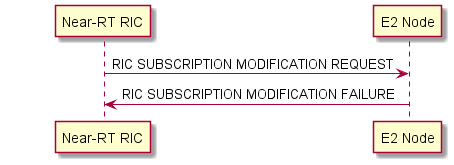

Figure 8.2.5.3-1: RIC Subscription Modification procedure, unsuccessful operation  on page 27


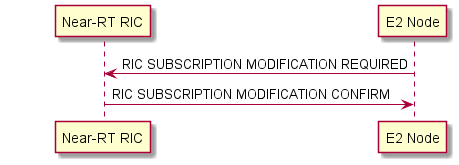

Figure 8.2.6.2-1: RIC Subscription Modification Required procedure, successful operation  on page 28


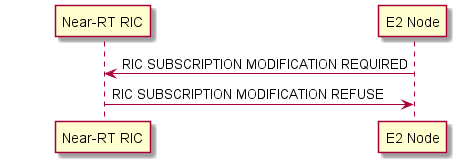

Figure 8.2.6.3-1: RIC Subscription Modification Required procedure, unsuccessful operation  on page 29


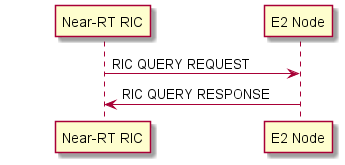

Figure 8.2.7.2-1: RIC Query procedure, successful operation  on page 30


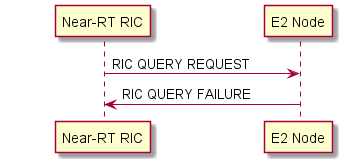

Figure 8.2.7.3-1: RIC Query procedure, unsuccessful operation  on page 30


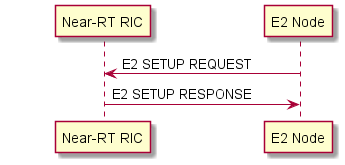

Figure 8.3.1.2-1: E2 Setup procedure, successful operation  on page 39


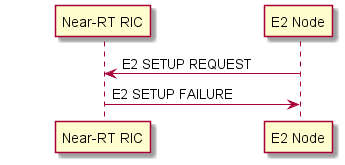

Figure 8.3.1.3-1: E2 Setup procedure, unsuccessful operation  on page 39


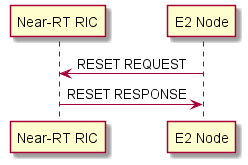

Figure 8.3.2.2-1: Reset, successful operation (E2 Node Initiated)  on page 40


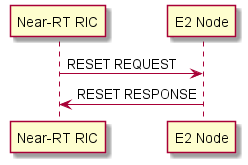

Figure 8.3.2.2-2: Reset, successful operation (Near-RT RIC Initiated)  on page 40


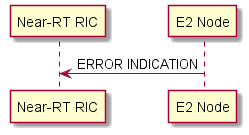

Figure 8.3.3.2-1: Error Indication, (E2 Node initiated) successful operation  on page 41


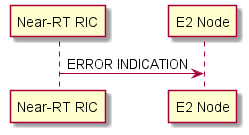

Figure 8.3.3.2-2: Error Indication, (Near-RT RIC Initiated) successful operation  on page 41


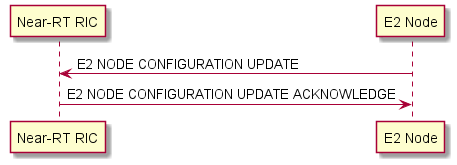

Figure 8.3.5.2-1: E2 Node Configuration Update procedure, successful operation  on page 45


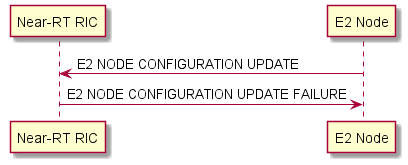

Figure 8.3.5.3-1: E2 Node Configuration Update procedure, unsuccessful operation  on page 46


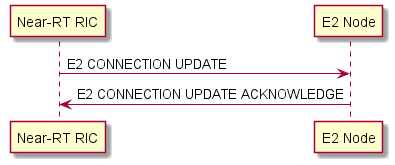

Figure 8.3.6.2-1: E2 Connection Update procedure, successful operation  on page 47


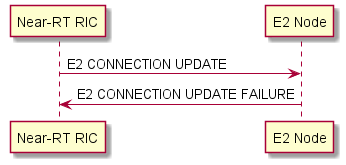

Figure 8.3.6.3-1: E2 Connection Update procedure, unsuccessful operation  on page 48


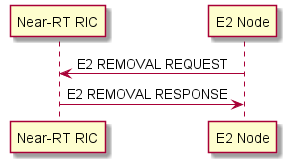

Figure 8.3.7.2-1: E2 Removal, successful operation (E2 Node Initiated)  on page 49


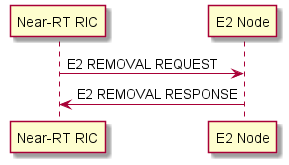

Figure 8.3.7.2-2: E2 Removal, successful operation (Near-RT RIC Initiated)  on page 49


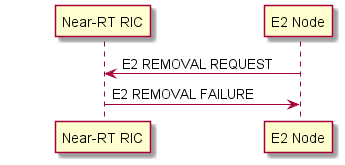

Figure 8.3.7.3-1: E2 Removal procedure (E2 Node Initiated), unsuccessful operation  on page 50


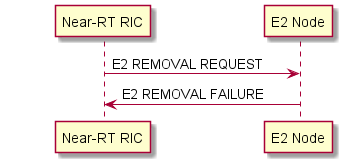

Figure 8.3.7.3-2: E2 Removal procedure (Near-RT RIC Initiated), unsuccessful operation  on page 50


In [210]:
for img in captioned_photos:
    display(Image(data=img['img']))
    print(img['caption'],f"on page {img['page']}")
